<a href="https://colab.research.google.com/github/kang-jeong-uk/OSSP/blob/main/Heart_Attack_Analysis_%26_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np # 행렬, 다차원 배열을 다룰 때 사용
import pandas as pd # 데이터를 다룰 때 사용
import seaborn as sns #matlab을 기반으로 한 시각화
import matplotlib.pyplot as plt
import plotly.graph_objs as go
import plotly.express as px
plt.style.use('fivethirtyeight')
plt.style.use('dark_background')

from google.colab import drive
drive.mount('/content/Kaggle_Heart_Attack_data')
import warnings

Drive already mounted at /content/Kaggle_Heart_Attack_data; to attempt to forcibly remount, call drive.mount("/content/Kaggle_Heart_Attack_data", force_remount=True).


In [ ]:
# data download : https://www.kaggle.com/datasets/rashikrahmanpritom/heart-attack-analysis-prediction-dataset?resource=download

data = pd.read_csv("/content/Kaggle_Heart_Attack_data/MyDrive/Kaggle_Heart_Attack_data/heart.csv")
data.head()



,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
display(data.info())
#display(data.describe())
display(data.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


None

(303, 14)

In [ ]:
output_graph1=px.pie(data, names= "sex",title="sex")
output_graph1.show()
output_graph2=px.pie(data, names= "output",title="Output")
output_graph2.show()

print("Female Value Counts: \n{}".format((data[data ["sex"] == 1].reset_index())['output'].value_counts()))
print("Male Value Counts: \n{}".format((data[data ["sex"] == 0].reset_index())['output'].value_counts()))

In [ ]:
plt.figure(figsize=(20,10))
sns.pairplot(data, hue="output", corner = True)
plt.legend("output")
plt.tight_layout()
plt.plot()

KeyboardInterrupt: ignored

<Figure size 1440x720 with 0 Axes>

Error in callback <function flush_figures at 0x7f6157a3ce50> (for post_execute):


KeyboardInterrupt: ignored

In [ ]:
print("Female Value Counts: \n{}".format(X['output'].value_counts()))
print("Male Value Counts: \n{}".format(Y['output'].value_counts()))

fig, ax1 = plt.subplots(1,2, figsize=(20,6))
plt.suptitle("Female                                                                                                                      Male")
sns.countplot("output", data=X, palette='gist_heat',ax=ax1[0])
sns.countplot("output", data=Y, palette='gist_heat',ax=ax1[1])
fig.show()

NameError: ignored

<Figure size 1296x432 with 0 Axes>

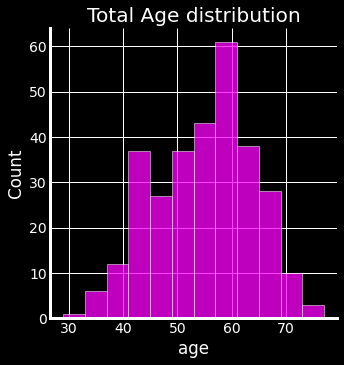

In [ ]:
plt.figure(figsize=(18,6))
sns.displot(data["age"], color="magenta")
plt.title("Total Age distribution")
plt.show()

In [ ]:
ax = px.histogram(data, x="age", color="output", title="Distribution Age and Output")
ax.show()

Female Value Counts: 
0    114
1     93
Name: output, dtype: int64
Male Value Counts: 
1    72
0    24
Name: output, dtype: int64
----------------나이 분포------------------
평균: 54
중앙값: 55
분산: 82
표준편차: 9.082

--------------성별에 따른 나이 분포-------------------
-남성-
평균: 56
중앙값: 57
분산: 89
표준편차: 9.409


-여성-
평균: 54
중앙값: 54
분산: 79
표준편차: 8.884

------------------Output에 따른 나이 분포-----------------------
-심장질병에 걸릴 확률이 높은 나이-
평균: 52
중앙: 52
분산: 91
표준편차: 9.551


-심장질병에 걸릴 확률이 낮은 나이-
평균: 57
중앙값: 58
분산: 63
표준편차: 7.962


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



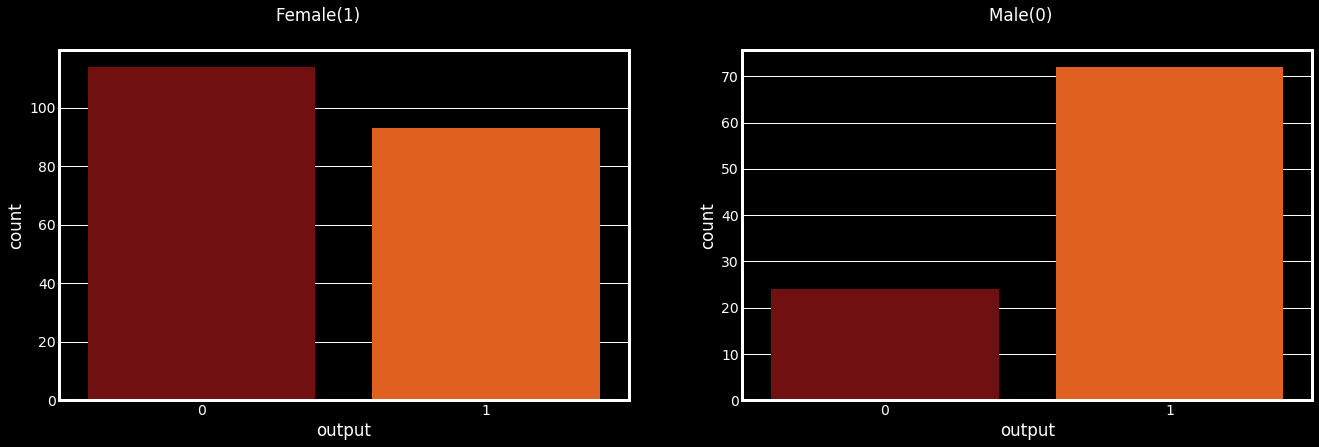

In [ ]:
X=data[data["sex"]==1].reset_index()  # 여성
Y=data[data["sex"]==0].reset_index()   # 남성

HR=data[data["output"]==1].reset_index()  # Output=1(심장질병에 걸릴 확률이 높은 데이터)
LR=data[data["output"]==0].reset_index()  # Output=0(심장질병에 걸릴 확률이 낮은 데이터)

print("Female Value Counts: \n{}".format(X['output'].value_counts()))
print("Male Value Counts: \n{}".format(Y['output'].value_counts()))

fig, ax1 = plt.subplots(1,2, figsize=(20,6))
plt.suptitle("Female(1)                                                                                                                     Male(0)")
sns.countplot("output", data=X, palette='gist_heat',ax=ax1[0])
sns.countplot("output", data=Y, palette='gist_heat',ax=ax1[1])
fig.show()

print("----------------나이 분포------------------")
print("평균: {}".format(round(data["age"].mean())))
print("중앙값: {}".format(round(data["age"].median())))
print("분산: {}".format(round(data["age"].var())))  
print("표준편차: {}\n".format(round((data["age"].std()),3)))


print("--------------성별에 따른 나이 분포-------------------")
print("-남성-")
print("평균: {}".format(round(Y["age"].mean())))
print("중앙값: {}".format(round(Y["age"].median())))
print("분산: {}".format(round(Y["age"].var())))
print("표준편차: {}\n\n".format(round((Y["age"].std()),3)))

print("-여성-")
print("평균: {}".format(round(X["age"].mean())))
print("중앙값: {}".format(round(X["age"].median())))
print("분산: {}".format(round(X["age"].var())))
print("표준편차: {}\n".format(round((X["age"].std()),3)))


print("------------------Output에 따른 나이 분포-----------------------")
print("-심장질병에 걸릴 확률이 높은 나이-")
print("평균: {}".format(round(HR["age"].mean())))
print("중앙: {}".format(round(HR["age"].median())))
print("분산: {}".format(round(HR["age"].var())))
print("표준편차: {}\n\n".format(round((HR["age"].std()),3)))

print("-심장질병에 걸릴 확률이 낮은 나이-")
print("평균: {}".format(round(LR["age"].mean())))
print("중앙값: {}".format(round(LR["age"].median())))
print("분산: {}".format(round(LR["age"].var())))
print("표준편차: {}".format(round((LR["age"].std()),3)))

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.8/dist-packages/seaborn/di

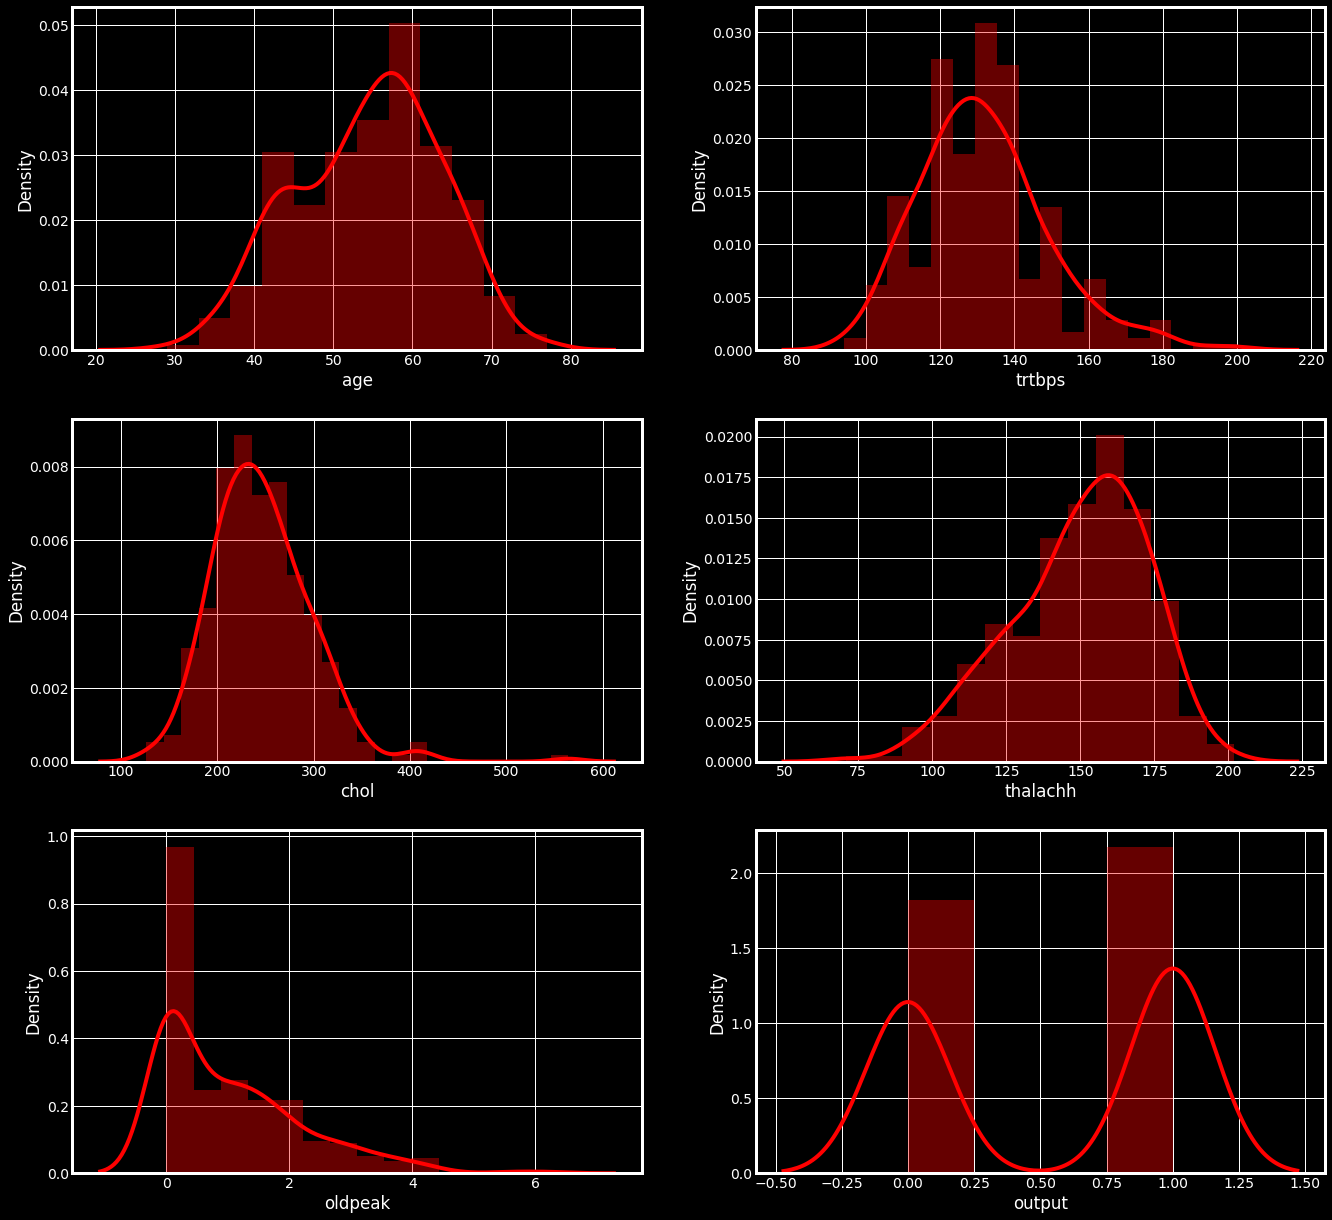

In [ ]:
# 분류형, 연속형 데이터 나누기
class_cols=["sex","output",'cp',"fbs","exng","restecg","thall","caa","slp"]
class_data=data[class_cols]

continuous_cols=["age","trtbps","chol","thalachh","oldpeak"]
continuous_data=data[continuous_cols]


# 분류형 데이터 그래프
for col in class_cols[2:]:
    ax=px.pie(data, names= col, title=col)
    ax.show()


# 연속형 데이터 그래프
continuous = ["age","trtbps","chol","thalachh","oldpeak", "output"]
fig, ax1 = plt.subplots(3,2, figsize=(20,20))
k = 0
for i in range(3):
  for j in range(2):
    sns.distplot(data[continuous[k]], ax = ax1[i][j], color = 'red')
    k +=1

plt.show()

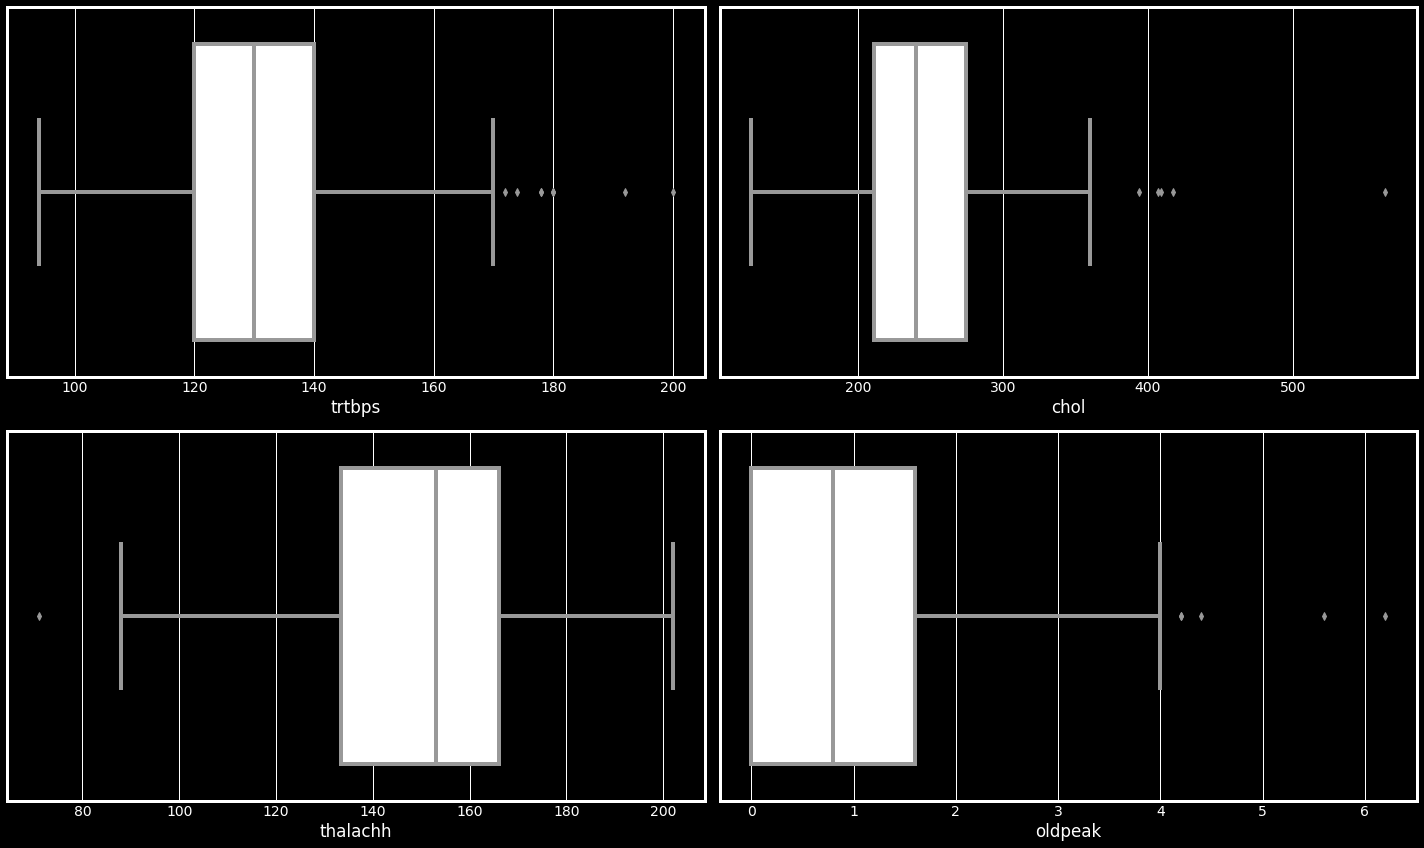

이상치 경계(최댓값 이상) :  81.25
이상치 경계(최솟값 이하) :  27.25
Outliners Present at position: 

trtbps: (array([], dtype=int64),)
trtbps: (array([  8, 101, 110, 152, 195, 203, 223, 228, 241, 248, 260, 266, 292]),)
chol: (array([ 28,  85,  96, 220, 246]),)
thalachh: (array([272]),)
oldpeak: (array([101, 204, 220, 221, 223, 250, 291, 295]),)

Column age outliers = 0 => 0.0%
Column trtbps outliers = 13 => 4.29%
Column chol outliers = 5 => 1.65%
Column thalachh outliers = 1 => 0.33%
Column oldpeak outliers = 8 => 2.64%


In [ ]:
# 이상치 판별, 시각화

continuous_cols=["age","trtbps","chol","thalachh","oldpeak"]
continuous_data=data[continuous_cols]

fig, ax1 = plt.subplots(2,2, figsize=(20,12))
k = 0
for i in range(2):
    for j in range(2):
        sns.boxplot(data=data,x=data[continuous_cols[1:][k]],saturation=1,ax=ax1[i][j],color="white")
        k+=1
plt.tight_layout()
plt.show()

# 이상치 탐색

Q3 = data["age"].quantile(q=0.75)
Q1 = data["age"].quantile(q=0.25)
IQR = Q3 - Q1

print("이상치 경계(최댓값 이상) : ",Q3 + IQR*1.5)
print("이상치 경계(최솟값 이하) : ", Q1 - IQR*1.5)


#Display the position of outliners.
print("Outliners Present at position: \n")
print("trtbps: {}".format(np.where(data['age']>=82.25)))
print("trtbps: {}".format(np.where(data['trtbps']>=170)))
print("chol: {}".format(np.where(data['chol']>=369.75)))
print("thalachh: {}".format(np.where(data['thalachh']<=84.75)))
print("oldpeak: {}\n".format(np.where(data['oldpeak']>=4)))



for k, v in continuous_data.items():
        q1 = v.quantile(0.25)
        q3 = v.quantile(0.75)
        irq = q3 - q1
        v_col = v[(v <= q1 - 1.5 * irq) | (v >= q3 + 1.5 * irq)]
        perc = np.shape(v_col)[0] * 100.0 / np.shape(data)[0]
        print("Column {} outliers = {} => {}%".format(k,len(v_col),round((perc),3)))

Int64Index([8, 101, 110, 152, 195, 203, 223, 228, 241, 248, 260, 266, 292], dtype='int64')
Int64Index([], dtype='int64')
Int64Index([28, 85, 96, 220, 246], dtype='int64')
Int64Index([], dtype='int64')
Int64Index([], dtype='int64')
Int64Index([272], dtype='int64')
Int64Index([204, 221, 250, 291, 295], dtype='int64')
Int64Index([], dtype='int64')


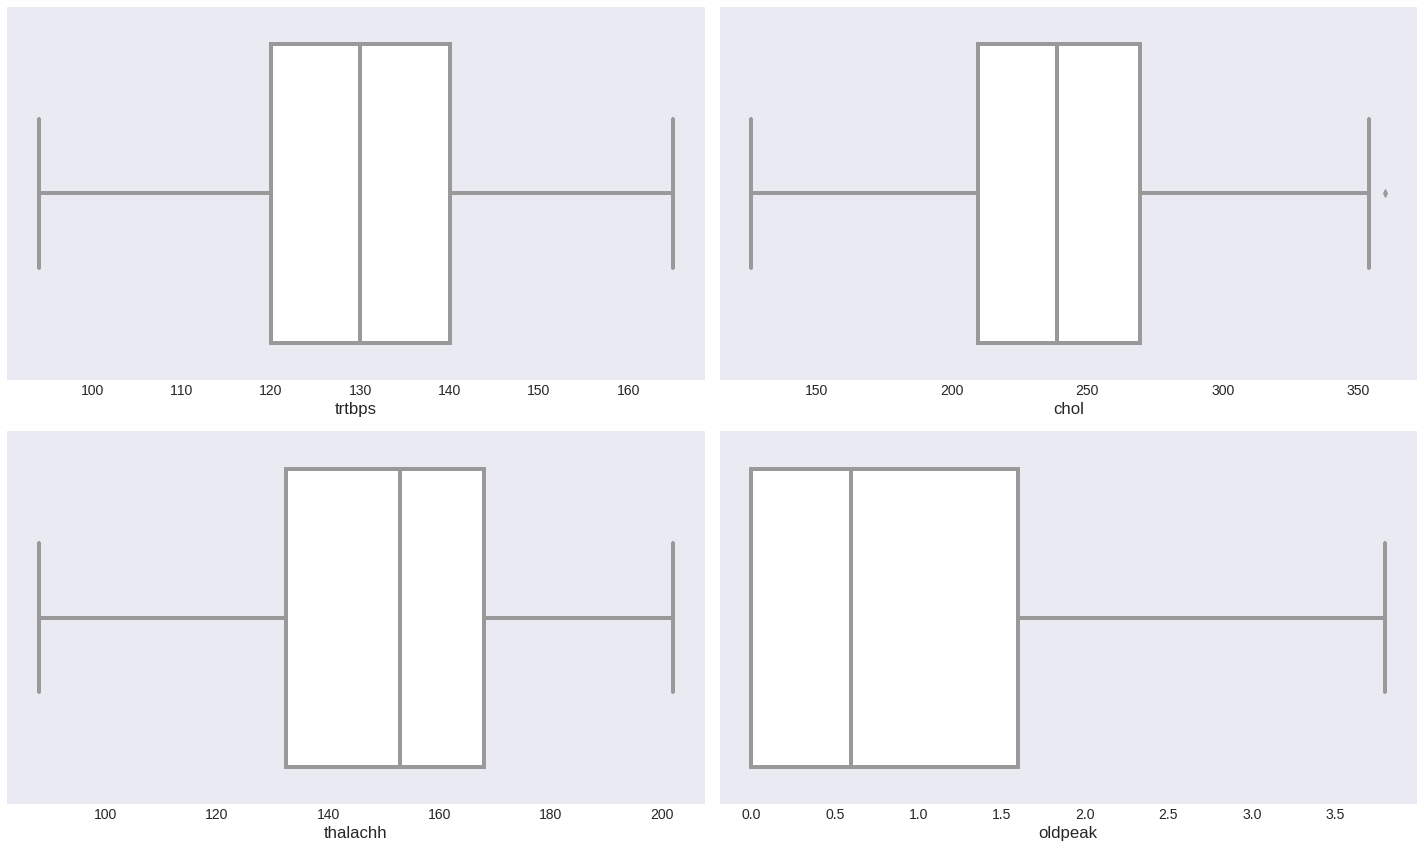

<class 'pandas.core.frame.DataFrame'>
Int64Index: 279 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       279 non-null    int64  
 1   sex       279 non-null    int64  
 2   cp        279 non-null    int64  
 3   trtbps    279 non-null    int64  
 4   chol      279 non-null    int64  
 5   fbs       279 non-null    int64  
 6   restecg   279 non-null    int64  
 7   thalachh  279 non-null    int64  
 8   exng      279 non-null    int64  
 9   oldpeak   279 non-null    float64
 10  slp       279 non-null    int64  
 11  caa       279 non-null    int64  
 12  thall     279 non-null    int64  
 13  output    279 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 40.8 KB


None

In [ ]:
# 이상치 제거(IQR)

import copy

continuous_cols=["age","trtbps","chol","thalachh","oldpeak"]
continuous_data=data[continuous_cols]

a=1
for a in range(1, 5):
  Q3 = data[continuous_cols[a]].quantile(q=0.75)
  Q1 = data[continuous_cols[a]].quantile(q=0.25)
  IQR = Q3 - Q1
  outliner_max = data[continuous_cols[a]] >= Q3 + IQR*1.5  # 이상치(최댓값 초과)
  outliner_min = data[continuous_cols[a]] <= Q1 - IQR*1.5  # 이상치(최솟값 미만)
  outliner_max_index = data[outliner_max].index  # 인덱스
  outliner_min_index = data[outliner_min].index  # 인덱스
  
  print(outliner_max_index)
  print(outliner_min_index)
  #print("----------------------------------------------")
  

  data.drop(outliner_max_index, inplace=True, errors='ignore')
  data.drop(outliner_min_index, inplace=True, errors='ignore')


fig, ax1 = plt.subplots(2,2, figsize=(20,12))
k = 0
for i in range(2):
    for j in range(2):
        sns.boxplot(data = data, x = data[continuous_cols[1:][k]],saturation=1,ax=ax1[i][j],color="white")
        k+=1
plt.tight_layout()
plt.show()

display(data.info())

In [ ]:
# 이상치 제거(로그 변환)
data["age"]= np.log(data.age)
data["trtbps"]= np.log(data.trtbps)
data["chol"]= np.log(data.chol)
data["thalachh"]= np.log(data.thalachh)
print("---Log Transform performed---")

continuous_cols=["age","trtbps","chol","thalachh","oldpeak"]
continuous_data=data[continuous_cols]
'''
fig, ax1 = plt.subplots(2,2, figsize=(20,12))
k = 0
for i in range(2):
    for j in range(2):
        sns.boxplot(data=data,x=data[continuous_cols[1:][k]],saturation=1,ax=ax1[i][j],color="white")
        k+=1
plt.tight_layout()
plt.show()
'''
for k, v in continuous_data.items():
        q1 = v.quantile(0.25)
        q3 = v.quantile(0.75)
        irq = q3 - q1
        v_col = v[(v <= q1 - 1.5 * irq) | (v >= q3 + 1.5 * irq)]
        perc = np.shape(v_col)[0] * 100.0 / np.shape(data)[0]
        print("Column {} outliers = {} => {}%".format(k,len(v_col),round((perc),3)))
display(data.head())

---Log Transform performed---
Column age outliers = 1 => 0.33%
Column trtbps outliers = 9 => 2.97%
Column chol outliers = 6 => 1.98%
Column thalachh outliers = 6 => 1.98%
Column oldpeak outliers = 8 => 2.64%


,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,4.143135,1,3,4.976734,5.451038,1,0,5.010635,0,2.3,0,0,1,1
1,3.610918,1,2,4.867534,5.521461,0,1,5.231109,0,3.5,0,0,2,1
2,3.713572,0,1,4.867534,5.318120,0,0,5.147494,0,1.4,2,0,2,1
3,4.025352,1,1,4.787492,5.463832,0,1,5.181784,0,0.8,2,0,2,1
4,4.043051,0,0,4.787492,5.869297,0,1,5.093750,1,0.6,2,0,2,1


In [ ]:
# one-hot encoding
cat_col = ['sex','cp','fbs','restecg', 'exng', 'slp', 'caa', 'thall']
data[cat_col] = data[cat_col].astype('category')
data = pd.get_dummies(data, columns=cat_col, drop_first=True)
display(data)

,age,trtbps,chol,thalachh,oldpeak,output,sex_1,cp_1,cp_2,cp_3,...,exng_1,slp_1,slp_2,caa_1,caa_2,caa_3,caa_4,thall_1,thall_2,thall_3
0,4.143135,4.976734,5.451038,5.010635,2.3,1,1,0,0,1,...,0,0,0,0,0,0,0,1,0,0
1,3.610918,4.867534,5.521461,5.231109,3.5,1,1,0,1,0,...,0,0,0,0,0,0,0,0,1,0
2,3.713572,4.867534,5.318120,5.147494,1.4,1,0,1,0,0,...,0,0,1,0,0,0,0,0,1,0
3,4.025352,4.787492,5.463832,5.181784,0.8,1,1,1,0,0,...,0,0,1,0,0,0,0,0,1,0
4,4.043051,4.787492,5.869297,5.093750,0.6,1,0,0,0,0,...,1,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,4.043051,4.941642,5.484797,4.812184,0.2,0,0,0,0,0,...,1,1,0,0,0,0,0,0,0,1
299,3.806662,4.700480,5.575949,4.882802,1.2,0,1,0,0,1,...,0,1,0,0,0,0,0,0,0,1
300,4.219508,4.969813,5.262690,4.948760,3.4,0,1,0,0,0,...,0,1,0,0,1,0,0,0,0,1
301,4.043051,4.867534,4.875197,4.744932,1.2,0,1,0,0,0,...,1,1,0,1,0,0,0,0,0,1


In [ ]:
# 데이터 분할(one-hot encoding 데이터)
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler

X = data.drop("output", axis=1)
Y = data["output"]
display(X)

X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=65) 

#MinMax Scaling / Normalization of data
MM_scaler = MinMaxScaler()
X_train = MM_scaler.fit_transform(X_train)
X_test = MM_scaler.fit_transform(X_test)


,age,trtbps,chol,thalachh,oldpeak,sex_1,cp_1,cp_2,cp_3,fbs_1,...,exng_1,slp_1,slp_2,caa_1,caa_2,caa_3,caa_4,thall_1,thall_2,thall_3
0,4.143135,4.976734,5.451038,5.010635,2.3,1,0,0,1,1,...,0,0,0,0,0,0,0,1,0,0
1,3.610918,4.867534,5.521461,5.231109,3.5,1,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
2,3.713572,4.867534,5.318120,5.147494,1.4,0,1,0,0,0,...,0,0,1,0,0,0,0,0,1,0
3,4.025352,4.787492,5.463832,5.181784,0.8,1,1,0,0,0,...,0,0,1,0,0,0,0,0,1,0
4,4.043051,4.787492,5.869297,5.093750,0.6,0,0,0,0,0,...,1,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,4.043051,4.941642,5.484797,4.812184,0.2,0,0,0,0,0,...,1,1,0,0,0,0,0,0,0,1
299,3.806662,4.700480,5.575949,4.882802,1.2,1,0,0,1,0,...,0,1,0,0,0,0,0,0,0,1
300,4.219508,4.969813,5.262690,4.948760,3.4,1,0,0,0,1,...,0,1,0,0,1,0,0,0,0,1
301,4.043051,4.867534,4.875197,4.744932,1.2,1,0,0,0,0,...,1,1,0,1,0,0,0,0,0,1


In [ ]:
# 데이터 분할(IQR 데이터)
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler

X = data.iloc[:,:13] # output제외, 0부터 12번 인덱스까지
Y = data["output"] # output 데이터만

X_train,X_test,Y_train,Y_test = train_test_split(X, Y, test_size=0.2, random_state = 65)

MM_scaler = MinMaxScaler()
X_train = MM_scaler.fit_transform(X_train)
X_test = MM_scaler.fit_transform(X_test)

In [ ]:
# 데이터 분할(로그 변환 데이터)
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
X=data.iloc[:,:13]
Y=data["output"]

X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=65) 

#MinMax Scaling / Normalization of data
MM_scaler = MinMaxScaler()
X_train = MM_scaler.fit_transform(X_train)
X_test = MM_scaler.fit_transform(X_test)

In [ ]:
import time
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

from sklearn.neural_network import MLPClassifier

from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier

def compute(Y_pred,Y_test):
    # output을 잘 예측했는지 시각화
    
    plt.figure(figsize=(12,6))
    plt.scatter(range(len(Y_pred)),Y_pred,color="yellow",lw=5,label="Predictions")
    plt.scatter(range(len(Y_test)),Y_test,color="red",label="Actual")
    plt.title("Prediction Values vs Real Values")
    plt.legend()
    plt.show()


    cm=confusion_matrix(Y_test,Y_pred)
    class_label = ["High-risk", "Low-risk"]
    df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
    sns.heatmap(df_cm,annot=True,cmap='Pastel1',linewidths=2,fmt='d')
    plt.title("Confusion Matrix",fontsize=15)
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.show()

    # 정확도 계산
    acc=accuracy_score(Y_test,Y_pred)
    mse=mean_squared_error(Y_test,Y_pred)
    precision, recall, fscore, train_support = score(Y_test, Y_pred, pos_label=1, average='binary')
    print('Precision: {} \nRecall: {} \nF1-Score: {} \nAccuracy: {} %\nMean Square Error: {}'.format(
        round(precision, 3), round(recall, 3), round(fscore,3), round((acc*100),3), round((mse),3)))

In [ ]:
# Logistic Regression / find best parameters and accuracy using GridSearch

parameters = {'penalty':['l2'], 
              'C':[0.01, 0.1, 1.0, 10.0, 100.0, 1000.0]}
model = LogisticRegression()
clf = GridSearchCV(model, parameters, verbose=2)
clf.fit(X_train, Y_train)

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

logreg_best_param = clf.best_params_
print("Best params for LR:", logreg_best_param)
predict = clf.predict(X_test)
print(classification_report(Y_test,predict))
print(confusion_matrix(Y_test, predict))
logreg_accuracy_score = accuracy_score(Y_test, predict)
print("Best accuracy for LR:", logreg_accuracy_score)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV] END .................................C=0.01, penalty=l2; total time=   0.0s
[CV] END .................................C=0.01, penalty=l2; total time=   0.0s
[CV] END .................................C=0.01, penalty=l2; total time=   0.0s
[CV] END .................................C=0.01, penalty=l2; total time=   0.0s
[CV] END .................................C=0.01, penalty=l2; total time=   0.0s
[CV] END ..................................C=0.1, penalty=l2; total time=   0.0s
[CV] END ..................................C=0.1, penalty=l2; total time=   0.0s
[CV] END ..................................C=0.1, penalty=l2; total time=   0.0s
[CV] END ..................................C=0.1, penalty=l2; total time=   0.0s
[CV] END ..................................C=0.1, penalty=l2; total time=   0.0s
[CV] END ..................................C=1.0, penalty=l2; total time=   0.0s
[CV] END ..................................C=1.0,

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/usr/local/lib/python3.8/dist-packages/sklearn/lin

Execution time of model: 0.04831 seconds



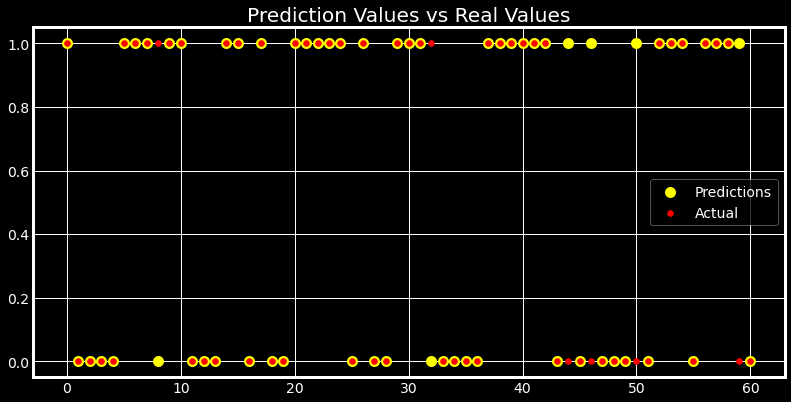

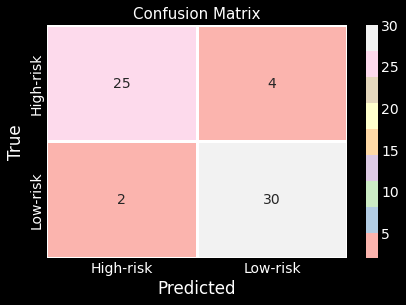

Precision: 0.882 
Recall: 0.938 
F1-Score: 0.909 
Accuracy: 90.164 %
Mean Square Error: 0.098


In [ ]:
# 1. Build Model(Logistic Regression)

start = time.time()

model_Log= LogisticRegression(random_state=10)
model_Log.fit(X_train,Y_train)
Y_pred= model_Log.predict(X_test)

end=time.time()

model_Log_time=end-start
model_Log_accuracy=round(accuracy_score(Y_test,Y_pred), 4)*100 # Accuracy

print(f"Execution time of model: {round((model_Log_time),5)} seconds\n")
#Plot and compute metricsW
compute(Y_pred,Y_test)



In [ ]:
# find K-nearest Neighbors best parameters and accuracy

parameters = {
    'n_neighbors' : [3,5,10, 11,17],
    'weights' :['uniform', 'distance']
   }

model = KNeighborsClassifier()
clf = GridSearchCV(model, parameters, verbose=2)
clf.fit(X_train, Y_train)

KN_best_param = clf.best_params_
print("Best params for KN:", KN_best_param)

predict = clf.predict(X_test)
print(classification_report(Y_test,predict))
print(confusion_matrix(Y_test, predict))
KN_accuracy_score = accuracy_score(Y_test, predict)
print("Best accuracy for KN:", KN_accuracy_score)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END .....................n_neighbors=3, weights=uniform; total time=   0.0s
[CV] END .....................n_neighbors=3, weights=uniform; total time=   0.0s
[CV] END .....................n_neighbors=3, weights=uniform; total time=   0.0s
[CV] END .....................n_neighbors=3, weights=uniform; total time=   0.0s
[CV] END .....................n_neighbors=3, weights=uniform; total time=   0.0s
[CV] END ....................n_neighbors=3, weights=distance; total time=   0.0s
[CV] END ....................n_neighbors=3, weights=distance; total time=   0.0s
[CV] END ....................n_neighbors=3, weights=distance; total time=   0.0s
[CV] END ....................n_neighbors=3, weights=distance; total time=   0.0s
[CV] END ....................n_neighbors=3, weights=distance; total time=   0.0s
[CV] END .....................n_neighbors=5, weights=uniform; total time=   0.0s
[CV] END .....................n_neighbors=5, wei

Execution time of model: 0.02698 seconds


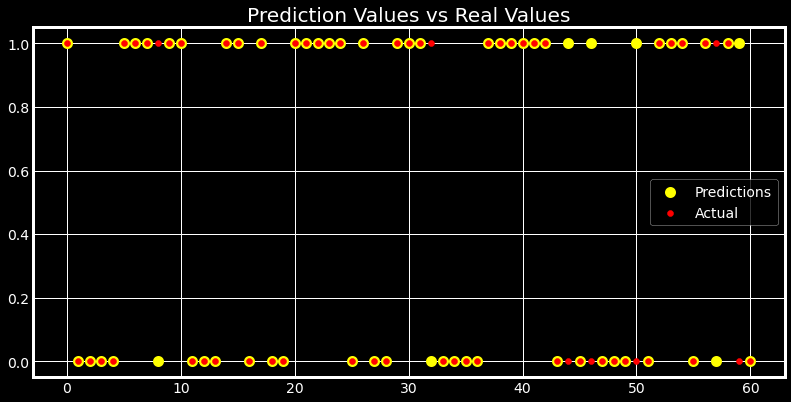

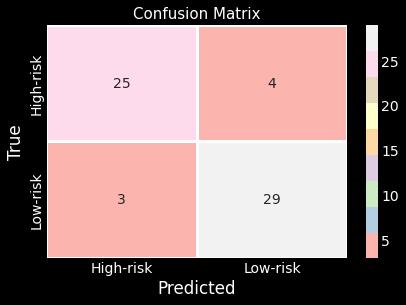

Precision: 0.879 
Recall: 0.906 
F1-Score: 0.892 
Accuracy: 88.525 %
Mean Square Error: 0.115


In [ ]:
# 2. Build Model(K-Nearest Neighbors)

start=time.time()

model_KNN = KNeighborsClassifier(n_neighbors=15)
model_KNN.fit(X_train,Y_train)
Y_pred = model_KNN.predict(X_test)

end=time.time()

model_KNN_time = end-start
model_KNN_accuracy=round(accuracy_score(Y_test,Y_pred), 4)*100 # Accuracy

print(f"Execution time of model: {round((model_KNN_time),5)} seconds")
#Plot and compute metric
compute(Y_pred,Y_test)

In [ ]:
# find Support Vector Machine best parameters and accuracy

parameters = {'kernel':('linear', 'rbf'), 'C':[0.1, 1.0, 10.0, 100.0, 1000.0],
              'gamma':[1,0.1,0.01]}
model = SVC()
clf = GridSearchCV(model, parameters, verbose=2)

clf.fit(X_train, Y_train)

svc_best_param = clf.best_params_
print("Best params for SVM:", svc_best_param)

predict = clf.predict(X_test)
print(classification_report(Y_test,predict))
print(confusion_matrix(Y_test, predict))

svc_accuracy_score = accuracy_score(Y_test, predict)
print("Best accuracy for SVM:", svc_accuracy_score)

Fitting 5 folds for each of 30 candidates, totalling 150 fits
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ....................C=0.1, gamma=0.1, kernel=linear; total time=   0.0s
[CV] END ....................C=0.1, gamma=0.1, 

Execution time of model: 0.01098 seconds


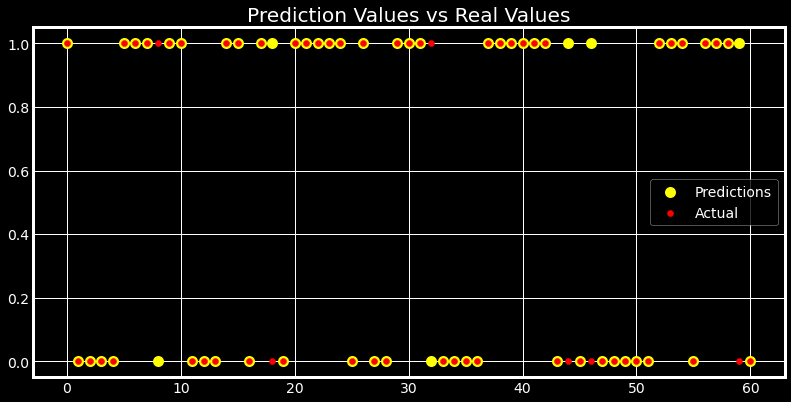

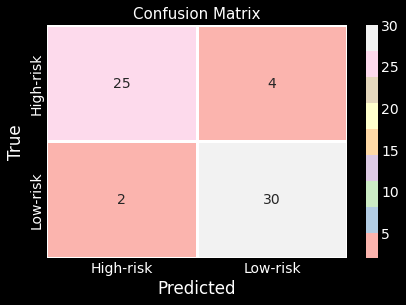

Precision: 0.882 
Recall: 0.938 
F1-Score: 0.909 
Accuracy: 90.164 %
Mean Square Error: 0.098


In [ ]:
# 3. Build Model(Support Vector Machine)

start=time.time()

model_svm=SVC(kernel="rbf")
model_svm.fit(X_train,Y_train)
Y_pred=model_svm.predict(X_test)

end=time.time()

model_svm_time=end-start
model_svm_accuracy=round(accuracy_score(Y_test,Y_pred), 4)*100 # Accuracy

print(f"Execution time of model: {round((model_svm_time),5)} seconds")
#Plot and compute metric
compute(Y_pred,Y_test)

In [ ]:
# find DecisionTree best parameters and accuracy

parameters = {
    'max_depth' : [2,3,4,5,6,7, 20, 50, 70, 100],
    'criterion' :['gini', 'entropy']
   }

model = DecisionTreeClassifier()
clf = GridSearchCV(model, parameters, verbose=2)
clf.fit(X_train, Y_train)

DTC_best_param = clf.best_params_
print("Best params for DTC:", DTC_best_param)

predict = clf.predict(X_test)
print(classification_report(Y_test,predict))
print(confusion_matrix(Y_test, predict))

Execution time of model: 0.00938 seconds


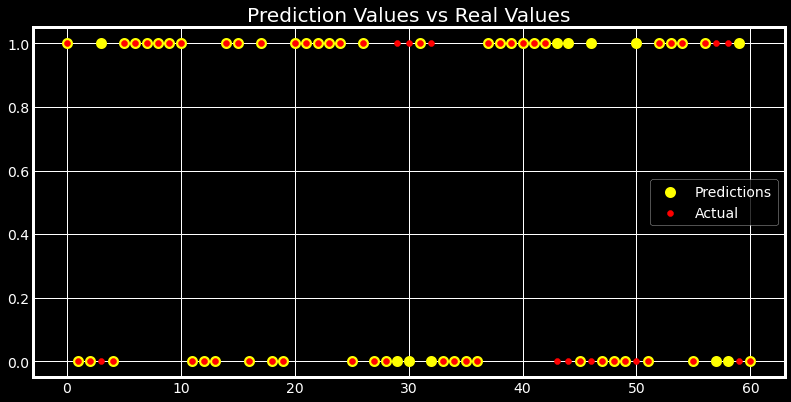

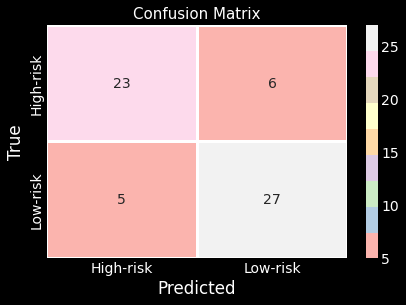

Precision: 0.818 
Recall: 0.844 
F1-Score: 0.831 
Accuracy: 81.967 %
Mean Square Error: 0.18


In [ ]:
# 4. Build Model(DecisionTree)
start=time.time()

model_tree=DecisionTreeClassifier(random_state=10,criterion="gini",max_depth=100)
model_tree.fit(X_train,Y_train)
Y_pred=model_tree.predict(X_test)

end=time.time()

model_tree_time=end-start
model_tree_accuracy=round(accuracy_score(Y_test,Y_pred), 4)*100 # Accuracy

print(f"Execution time of model: {round((model_tree_time),5)} seconds")
#Plot and compute metric
compute(Y_pred,Y_test)

In [ ]:
# find RandomForest best parameters and accuracy

parameters = {
    'max_features': ['auto', 'sqrt', 'log2'],
    'n_estimators' : [300,200,100,50,25,10],
    'max_depth' : [4,5,6,7,10,20,50,100],
    'criterion' :['gini']
   }

model = RandomForestClassifier()
clf = GridSearchCV(model, parameters, verbose=2)
clf.fit(X_train,Y_train)

RFC_best_param = clf.best_params_
print("Best params for RFC:", RFC_best_param)
predict = clf.predict(X_test)
print(classification_report(Y_test,predict))
print(confusion_matrix(Y_test, predict))

RFC_accuracy_score = accuracy_score(Y_test, predict)
print("Best accuracy for RFC:", RFC_accuracy_score)

Fitting 5 folds for each of 144 candidates, totalling 720 fits
[CV] END criterion=gini, max_depth=4, max_features=auto, n_estimators=300; total time=   2.0s
[CV] END criterion=gini, max_depth=4, max_features=auto, n_estimators=300; total time=   2.5s
[CV] END criterion=gini, max_depth=4, max_features=auto, n_estimators=300; total time=   1.3s
[CV] END criterion=gini, max_depth=4, max_features=auto, n_estimators=300; total time=   0.8s
[CV] END criterion=gini, max_depth=4, max_features=auto, n_estimators=300; total time=   0.8s
[CV] END criterion=gini, max_depth=4, max_features=auto, n_estimators=200; total time=   0.5s
[CV] END criterion=gini, max_depth=4, max_features=auto, n_estimators=200; total time=   0.5s
[CV] END criterion=gini, max_depth=4, max_features=auto, n_estimators=200; total time=   0.5s
[CV] END criterion=gini, max_depth=4, max_features=auto, n_estimators=200; total time=   0.3s
[CV] END criterion=gini, max_depth=4, max_features=auto, n_estimators=200; total time=   0.

Execution time of model: 1.67716 seconds


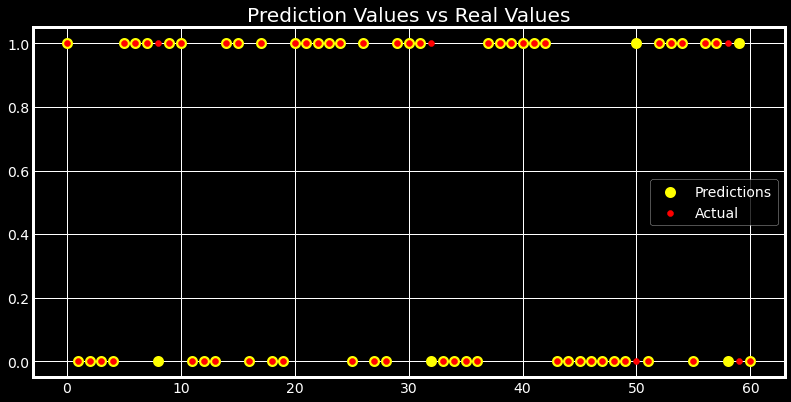

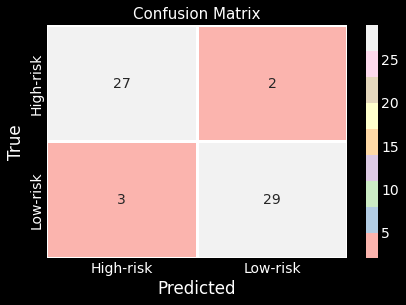

Precision: 0.935 
Recall: 0.906 
F1-Score: 0.921 
Accuracy: 91.803 %
Mean Square Error: 0.082


In [ ]:
# 5. Build Model(RandomForest)
start=time.time()

model_RF = RandomForestClassifier(n_estimators=300,criterion="gini",random_state=5,max_depth=100)
model_RF.fit(X_train,Y_train)
Y_pred=model_RF.predict(X_test)

end=time.time()

model_RF_time=end-start
model_RF_accuracy=round(accuracy_score(Y_test,Y_pred), 4)*100 # Accuracy

print(f"Execution time of model: {round((model_RF_time),5)} seconds")
#Plot and compute metric
compute(Y_pred,Y_test)

In [ ]:
# find Adaboost best parameters and accuracy

parameters = {
    'learning_rate' : [0.2, 0.17,0.15, 0.1, 0.01, 0.001, 0.05],
    'n_estimators' : [2,3,4,5,6,7,8,9,10,15, 25, 30, 50 ,75, 100],
        }


model = AdaBoostClassifier()
clf = GridSearchCV(model, parameters, verbose=2)
clf.fit(X_train, Y_train)
Ada_best_param = clf.best_params_
print("Best params for Ada:", Ada_best_param)

predict = clf.predict(X_test)
print(classification_report(Y_test,predict))
print(confusion_matrix(Y_test, predict))

Ada_accuracy_score = accuracy_score(Y_test, predict)
print("Best accuracy for RFC:", Ada_accuracy_score)

Fitting 5 folds for each of 105 candidates, totalling 525 fits
[CV] END ..................learning_rate=0.2, n_estimators=2; total time=   0.0s
[CV] END ..................learning_rate=0.2, n_estimators=2; total time=   0.0s
[CV] END ..................learning_rate=0.2, n_estimators=2; total time=   0.0s
[CV] END ..................learning_rate=0.2, n_estimators=2; total time=   0.0s
[CV] END ..................learning_rate=0.2, n_estimators=2; total time=   0.0s
[CV] END ..................learning_rate=0.2, n_estimators=3; total time=   0.0s
[CV] END ..................learning_rate=0.2, n_estimators=3; total time=   0.0s
[CV] END ..................learning_rate=0.2, n_estimators=3; total time=   0.0s
[CV] END ..................learning_rate=0.2, n_estimators=3; total time=   0.0s
[CV] END ..................learning_rate=0.2, n_estimators=3; total time=   0.0s
[CV] END ..................learning_rate=0.2, n_estimators=4; total time=   0.0s
[CV] END ..................learning_rate=0.2, 

Execution time of model: 0.17879 seconds


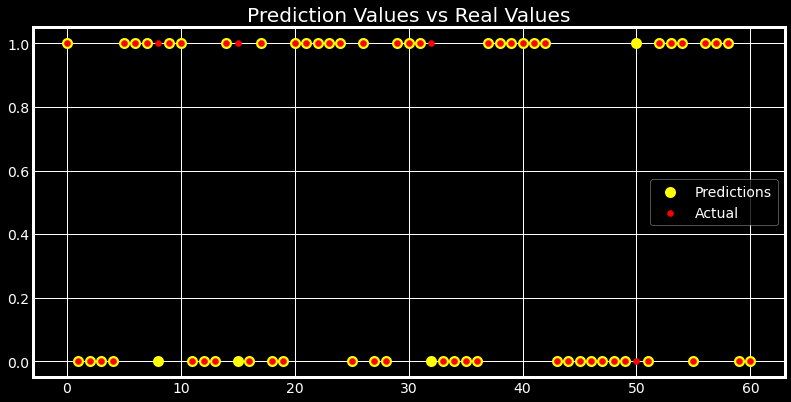

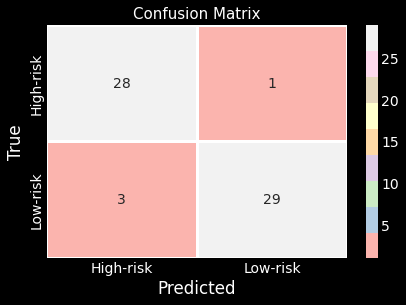

Precision: 0.967 
Recall: 0.906 
F1-Score: 0.935 
Accuracy: 93.443 %
Mean Square Error: 0.066


In [ ]:
# 6. Build Model(AdaBoost)
start=time.time()

model_ADA=AdaBoostClassifier(learning_rate= 0.15, n_estimators= 25)
model_ADA.fit(X_train,Y_train)
Y_pred= model_ADA.predict(X_test)

end=time.time()

model_ADA_time=end-start
model_ADA_accuracy=round(accuracy_score(Y_test,Y_pred), 4)*100 # Accuracy

print(f"Execution time of model: {round((model_ADA_time),5)} seconds")
#Plot and compute metric
compute(Y_pred,Y_test)

In [ ]:
# find Gradientboost best parameters and accuracy

parameters = {
    'learning_rate' : [0.17,0.15, 0.1, 0.01,0.001, 0.05],
    'n_estimators' : [10, 15, 25, 30, 50 ,75, 100],
    'max_depth' : [1,2,4, 5, 10,20, 50, 100],
        }


model = GradientBoostingClassifier()
clf = GridSearchCV(model, parameters, verbose=2)
clf.fit(X_train, Y_train)
Gradient_best_param = clf.best_params_
print("Best params for Gradient:", Gradient_best_param)

predict = clf.predict(X_test)
print(classification_report(Y_test,predict))
print(confusion_matrix(Y_test, predict))

Ada_accuracy_score = accuracy_score(Y_test, predict)
print("Best accuracy for RFC:", Ada_accuracy_score)

Fitting 5 folds for each of 336 candidates, totalling 1680 fits
[CV] END ...learning_rate=0.17, max_depth=1, n_estimators=10; total time=   0.0s
[CV] END ...learning_rate=0.17, max_depth=1, n_estimators=10; total time=   0.0s
[CV] END ...learning_rate=0.17, max_depth=1, n_estimators=10; total time=   0.0s
[CV] END ...learning_rate=0.17, max_depth=1, n_estimators=10; total time=   0.0s
[CV] END ...learning_rate=0.17, max_depth=1, n_estimators=10; total time=   0.0s
[CV] END ...learning_rate=0.17, max_depth=1, n_estimators=15; total time=   0.0s
[CV] END ...learning_rate=0.17, max_depth=1, n_estimators=15; total time=   0.0s
[CV] END ...learning_rate=0.17, max_depth=1, n_estimators=15; total time=   0.0s
[CV] END ...learning_rate=0.17, max_depth=1, n_estimators=15; total time=   0.0s
[CV] END ...learning_rate=0.17, max_depth=1, n_estimators=15; total time=   0.0s
[CV] END ...learning_rate=0.17, max_depth=1, n_estimators=25; total time=   0.0s
[CV] END ...learning_rate=0.17, max_depth=1, 

Execution time of model: 0.05321 seconds


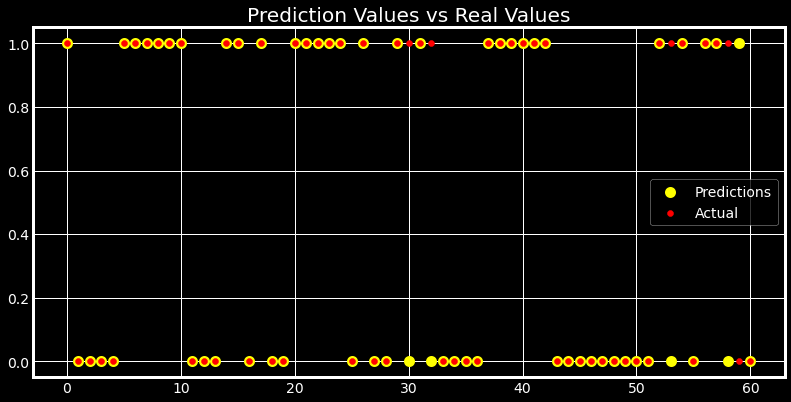

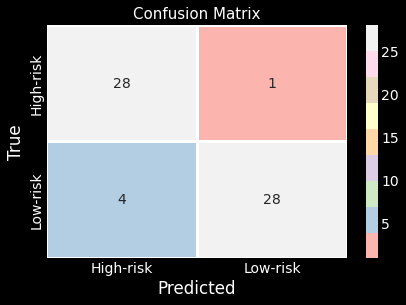

Precision: 0.966 
Recall: 0.875 
F1-Score: 0.918 
Accuracy: 91.803 %
Mean Square Error: 0.082


In [ ]:
# 7. Build Model(Gradient Boosting)
start=time.time()

model_GB= GradientBoostingClassifier(random_state=10,n_estimators=20,learning_rate=0.29,loss="deviance")
model_GB.fit(X_train,Y_train)
Y_pred= model_GB.predict(X_test)

end=time.time()

model_GB_time=end-start
model_GB_accuracy=round(accuracy_score(Y_test,Y_pred), 4)*100 # Accuracy

print(f"Execution time of model: {round((model_GB_time),5)} seconds")
#Plot and compute metric
compute(Y_pred,Y_test)

In [ ]:
# find XGBoost best parameters and accuracy

parameters = {
    'objective' : ['binary:logistic'],
    'learning_rate' : [0.2, 0.1, 0.05, 0.01],
    'n_estimators': [10, 25,30, 40, 50,60, 70, 100],
    'colsample_bytree' : [0.3, 0.4, 0.5, 0.6, 0.7,0.8, 0.9],
    'max_depth': [1,2,3,4,5, 10, 20, 50, 100],
        }
model = XGBClassifier()
clf = GridSearchCV(model, parameters, verbose=2)
clf.fit(X_train, Y_train)
XGB_best_param = clf.best_params_
print("Best params for XGB:", XGB_best_param)

predict = clf.predict(X_test)
print(classification_report(Y_test,predict))
print(confusion_matrix(Y_test, predict))

XGB_accuracy_score = accuracy_score(Y_test, predict)
print("Best accuracy for RFC:", XGB_accuracy_score)

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
[CV] END colsample_bytree=0.6, learning_rate=0.05, max_depth=2, n_estimators=30, objective=binary:logistic; total time=   0.0s
[CV] END colsample_bytree=0.6, learning_rate=0.05, max_depth=2, n_estimators=30, objective=binary:logistic; total time=   0.0s
[CV] END colsample_bytree=0.6, learning_rate=0.05, max_depth=2, n_estimators=40, objective=binary:logistic; total time=   0.0s
[CV] END colsample_bytree=0.6, learning_rate=0.05, max_depth=2, n_estimators=40, objective=binary:logistic; total time=   0.0s
[CV] END colsample_bytree=0.6, learning_rate=0.05, max_depth=2, n_estimators=40, objective=binary:logistic; total time=   0.0s
[CV] END colsample_bytree=0.6, learning_rate=0.05, max_depth=2, n_estimators=40, objective=binary:logistic; total time=   0.0s
[CV] END colsample_bytree=0.6, learning_rate=0.05, max_depth=2, n_estimators=40, objective=binary:logistic; total time=   0.0s
[CV] END colsample_bytree=0.6, learning_rate=0.05, max_depth=2, n_estimator

Execution time of model: 0.1595 seconds


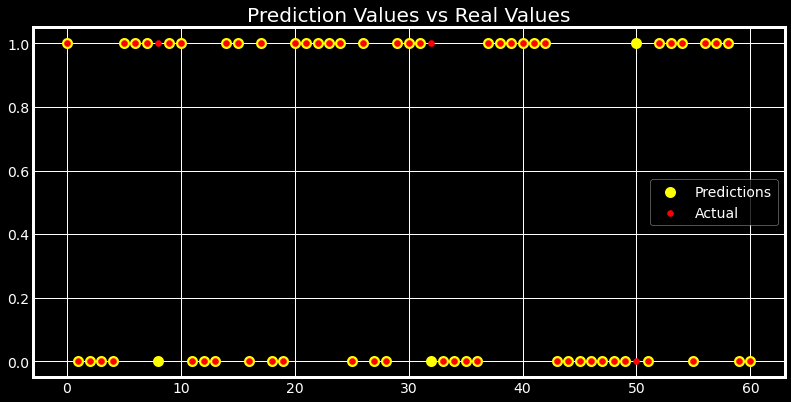

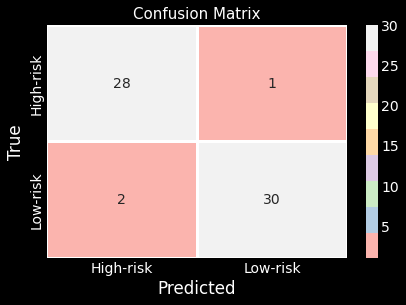

Precision: 0.968 
Recall: 0.938 
F1-Score: 0.952 
Accuracy: 95.082 %
Mean Square Error: 0.049


In [ ]:
# 8. Build Model(XG Boost)
start=time.time()

model_xgb = XGBClassifier(objective='binary:logistic',learning_rate=0.1,
                          max_depth=1,
                          n_estimators = 50,
                          colsample_bytree = 0.5)
model_xgb.fit(X_train,Y_train)
Y_pred = model_xgb.predict(X_test)

end=time.time()

model_xgb_time=end-start
model_xgb_accuracy=round(accuracy_score(Y_test,Y_pred), 4)*100 # Accuracy

print(f"Execution time of model: {round((model_xgb_time),5)} seconds")
#Plot and compute metric
compute(Y_pred,Y_test)

/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (150) reached and the optimization hasn't converged yet.



Execution time of model: 2.38173 seconds


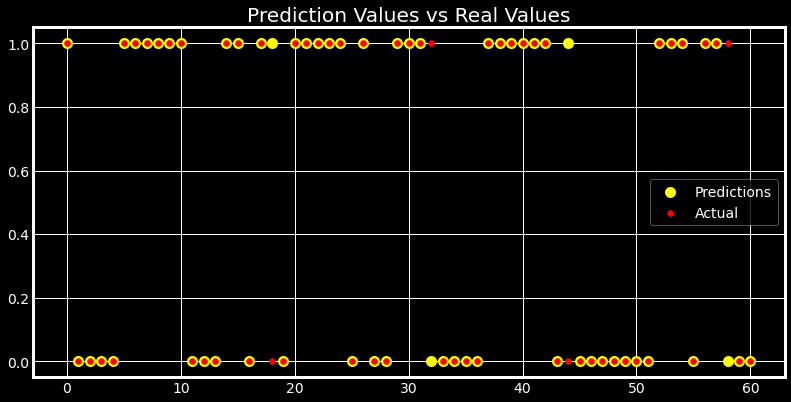

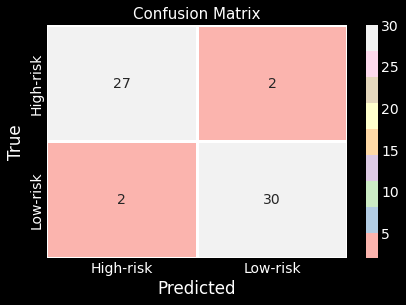

Precision: 0.938 
Recall: 0.938 
F1-Score: 0.938 
Accuracy: 93.443 %
Mean Square Error: 0.066


In [ ]:
# 9. Build Model(MLP)

start=time.time()

model_MLP = MLPClassifier(random_state=48,hidden_layer_sizes=(150,100,50), max_iter=150,activation = 'relu',solver='adam')
model_MLP.fit(X_train, Y_train)
Y_pred=model_MLP.predict(X_test)

end=time.time()

model_MLP_time=end-start
model_MLP_accuracy=round(accuracy_score(Y_test,Y_pred), 4)*100 # Accuracy

print(f"Execution time of model: {round((model_MLP_time),5)} seconds")
#Plot and compute metric
compute(Y_pred,Y_test)

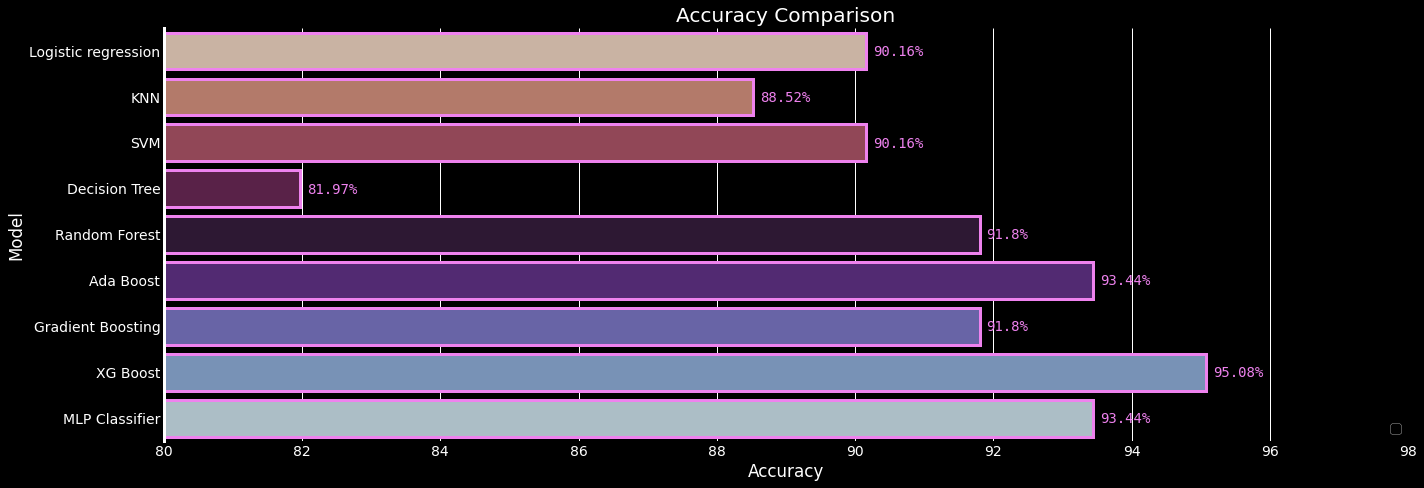

In [ ]:
# Compare Accurcy

accuracies={"Logistic regression": model_Log_accuracy,
            "KNN": model_KNN_accuracy,
            "SVM": model_svm_accuracy,
            "Decision Tree": model_tree_accuracy,
            "Random Forest": model_RF_accuracy,
            "Ada Boost": model_ADA_accuracy,
            "Gradient Boosting": model_GB_accuracy,
            "XG Boost": model_xgb_accuracy,
            "MLP Classifier": model_MLP_accuracy}

acc_list=accuracies.items()
k,v = zip(*acc_list) 
temp=pd.DataFrame(index=k,data=v,columns=["Accuracy"])
#temp.sort_values(by=["Accuracy"],ascending=False,inplace=True)

#Plot accuracy for different models
plt.figure(figsize=(20,7))
ACC=sns.barplot(y=temp.index,x=temp["Accuracy"],edgecolor="violet",linewidth=3,orient="h",palette="twilight_r")
plt.ylabel("Model")
plt.title("Accuracy Comparison")
plt.xlim(80,98)

ACC.spines['left'].set_linewidth(3)
for w in ['right', 'top', 'bottom']:
    ACC.spines[w].set_visible(False)
    
#Write text on barplots
k=0
for ACC in ACC.patches:
    width = ACC.get_width()
    plt.text(width+0.1, (ACC.get_y() + ACC.get_height()-0.3),s="{}%".format(temp["Accuracy"][k]),fontname = 'monospace', fontsize = 14, color = 'violet') 
    k+=1
    
plt.legend(loc="lower right")
plt.tight_layout()
plt.show()

In [ ]:
param_grid = {'learning_rate':[0.29, 0.15,0.1,0.05,0.01,0.005,0.001], 'n_estimators':[20, 100,250,500,750,1000,1250,1500,1750]}

grid_search = GridSearchCV(
    GradientBoostingClassifier(max_depth=4, min_samples_split=2, min_samples_leaf=1, subsample=1,max_features='sqrt', random_state=10), 
    param_grid, scoring='accuracy', cv=5)

grid_search.fit(X_train, Y_train)

GridSearchCV(cv=5,
             estimator=GradientBoostingClassifier(max_depth=4,
                                                  max_features='sqrt',
                                                  random_state=10,
                                                  subsample=1),
             param_grid={'learning_rate': [0.29, 0.15, 0.1, 0.05, 0.01, 0.005,
                                           0.001],
                         'n_estimators': [20, 100, 250, 500, 750, 1000, 1250,
                                          1500, 1750]},
             scoring='accuracy')

In [ ]:
print("Train set score: {:.2f}".format(grid_search.score(X_train, Y_train)))
print("Test set score: {:.2f}".format(grid_search.score(X_test, Y_test)))
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

Train set score: 0.96
Test set score: 0.90
Best parameters: {'learning_rate': 0.15, 'n_estimators': 20}
Best cross-validation score: 0.80


In [ ]:
print("Best estimator:\n{}".format(grid_search.best_estimator_))

Best estimator:
GradientBoostingClassifier(learning_rate=0.15, max_depth=4, max_features='sqrt',
                           n_estimators=20, random_state=10, subsample=1)
